# BSNL Mobile Traffic Analysis

## Objective :

## 1. 2G Voice Call Traffic Analysis

## 2. Predicting TCH DROP CALL RATE

In [277]:
# Importing Required Librarires

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Data Collection

In [223]:
'''
pd.read_csv()
pd.read_excel()
pd.read_html()
pd.read_json()
pd.read_sql()

'''

# Importing Data Set of 2G Voice Traffic

df2g = pd.read_csv('NSN_KPI_REPORT_111018_2g.csv')

## 2. Data Cleaning

In [224]:
'''
df.head(),
df.shape,
df.info(),
df.columns,
df.drop(),
df.describe(),
df.isnull(),
df.fillna(),
df.dropna(),
df.replace(),
'''

# Displaying 1st 5 Records in the Data Set

df2g.head()

,Period start time,BSC name,BCF name,BTS name,Total Calls,TCH_ABIS_FAIL_CALL (c001084),TCH DROP RATE,TCH_RADIO_FAIL (c001013),TCH_BTS_FAIL (c001047),Call Setup Success Rate - overall,...,TCH traffic sum,Total Drop Calls,totaltraffic,NUMBER OF _SDCCH_SUCCESS,NUMBER OF_SDCCH_ATTEMPTS,CALL_SUCCESS,CALL_ATTEMPTS,Amount of active TRX,Cell avail accuracy 1s cellL,ConfiguredTRX
0,11-10-18,BSC_APNB504_TRP,504_100_Poyya_VIOM_CT5075,504_41001_Poyya_VIOM_CT5075,1523,3,1.02,61,0,97.16,...,1.68,12.0,40.43,31826,31826,1523.0,1523,2.0,95.39,3
1,11-10-18,BSC_APNB504_TRP,504_100_Poyya_VIOM_CT5075,504_41002_Poyya_VIOM_CT5075,6746,55,1.68,226,0,83.56,...,6.01,112.0,144.33,59472,62627,6746.0,6986,3.0,95.39,3
2,11-10-18,BSC_APNB504_TRP,504_100_Poyya_VIOM_CT5075,504_41003_Poyya_VIOM_CT5075,4041,16,0.57,68,0,97.59,...,4.34,15.0,104.13,31844,31852,4041.0,4041,3.0,95.39,3
3,11-10-18,BSC_APNB504_TRP,504_101_Nagari_VIOM_CT5078,504_41011_Nagari_VIOM_CT5078,7092,15,0.16,19,0,99.91,...,7.60,11.0,182.29,29563,29563,7092.0,7092,3.0,100.00,3
4,11-10-18,BSC_APNB504_TRP,504_101_Nagari_VIOM_CT5078,504_41012_Nagari_VIOM_CT5078,2566,6,0.04,7,0,99.96,...,2.51,-1.0,60.18,13231,13231,2566.0,2566,2.0,100.00,3


In [225]:
# Shape of the data set

df2g.shape

(689, 40)

In [226]:
# Information about Data Set,no.of Rows, no.of Columns, Column names and its Data Types

# Observe whether no of rows are equal in all columns or not...
# if no.of rows are not equal then there might be null values that need to be addressed

df2g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 40 columns):
Period start time                            689 non-null object
BSC name                                     689 non-null object
BCF name                                     689 non-null object
BTS name                                     689 non-null object
Total Calls                                  689 non-null int64
TCH_ABIS_FAIL_CALL (c001084)                 689 non-null int64
TCH DROP RATE                                672 non-null float64
TCH_RADIO_FAIL (c001013)                     689 non-null int64
TCH_BTS_FAIL (c001047)                       689 non-null int64
Call Setup Success Rate - overall            666 non-null float64
Assign Fail Ratio Cell                       689 non-null float64
HO ratio, Power budget ratio                 689 non-null float64
HO ratio, DL level                           689 non-null float64
HO ratio, DL quality                         689 

In [227]:
# Displaying column names

df2g.columns

Index(['Period start time', 'BSC name', 'BCF name', 'BTS name', 'Total Calls',
       'TCH_ABIS_FAIL_CALL (c001084)', 'TCH DROP RATE',
       'TCH_RADIO_FAIL (c001013)', 'TCH_BTS_FAIL (c001047)',
       'Call Setup Success Rate - overall', 'Assign Fail Ratio Cell',
       'HO ratio, Power budget ratio', 'HO ratio, DL level',
       'HO ratio, DL quality', 'HO ratio, BSC controlled TRHO',
       'HO ratio, UL quality', 'HO ratio, UL level', 'HOSR',
       'Incoming BSC Ctrl Ho SR', 'PEAK_BUSY_SDCCH (c002032)',
       'Average available SDCCH', 'Average number of busy half rate TCHs.',
       'Average number of busy full rate TCHs.',
       'Average available dedicated GPRS channels',
       'Number of TSLs available for CS traffic', 'HO FAIL RATE',
       'Outgoing BSC Ctrl HO SR', 'SDCCH blocking rate', 'TCH blocking rate',
       'Average FTCH hold time', 'TCH traffic sum', 'Total Drop Calls',
       'totaltraffic', 'NUMBER OF _SDCCH_SUCCESS', 'NUMBER OF_SDCCH_ATTEMPTS',
       'CALL_

In [228]:
# Droping useless Columns

df2gmod = df2g.drop(columns = ['Period start time','BSC name','TCH_ABIS_FAIL_CALL (c001084)',
       'TCH_RADIO_FAIL (c001013)', 'TCH_BTS_FAIL (c001047)','Assign Fail Ratio Cell',
       'HO ratio, Power budget ratio', 'HO ratio, DL level',
       'HO ratio, DL quality', 'HO ratio, BSC controlled TRHO',
       'HO ratio, UL quality', 'HO ratio, UL level','Incoming BSC Ctrl Ho SR', 'PEAK_BUSY_SDCCH (c002032)',
       'Average available SDCCH', 'Average number of busy half rate TCHs.',
       'Average number of busy full rate TCHs.',
       'Average available dedicated GPRS channels',
       'Number of TSLs available for CS traffic','Outgoing BSC Ctrl HO SR', 'SDCCH blocking rate','Average FTCH hold time', 
       'TCH traffic sum','totaltraffic', 'NUMBER OF _SDCCH_SUCCESS', 'NUMBER OF_SDCCH_ATTEMPTS','Amount of active TRX',
       'Cell avail accuracy 1s cellL', 'ConfiguredTRX'])

In [229]:
# Displaying 1st 5 records after dropping of useless columns

df2gmod.head()

,BCF name,BTS name,Total Calls,TCH DROP RATE,Call Setup Success Rate - overall,HOSR,HO FAIL RATE,TCH blocking rate,Total Drop Calls,CALL_SUCCESS,CALL_ATTEMPTS
0,504_100_Poyya_VIOM_CT5075,504_41001_Poyya_VIOM_CT5075,1523,1.02,97.16,98.05,1.95,0.00,12.0,1523.0,1523
1,504_100_Poyya_VIOM_CT5075,504_41002_Poyya_VIOM_CT5075,6746,1.68,83.56,97.36,2.64,3.44,112.0,6746.0,6986
2,504_100_Poyya_VIOM_CT5075,504_41003_Poyya_VIOM_CT5075,4041,0.57,97.59,98.63,1.37,0.00,15.0,4041.0,4041
3,504_101_Nagari_VIOM_CT5078,504_41011_Nagari_VIOM_CT5078,7092,0.16,99.91,98.77,1.23,0.00,11.0,7092.0,7092
4,504_101_Nagari_VIOM_CT5078,504_41012_Nagari_VIOM_CT5078,2566,0.04,99.96,97.64,2.36,0.00,-1.0,2566.0,2566


In [230]:
# Capitalising all column names

df2gmod.columns = df2gmod.columns.str.upper()

In [231]:
# Displaying 1st 5 Records after capitalising column names

df2gmod.head()

,BCF NAME,BTS NAME,TOTAL CALLS,TCH DROP RATE,CALL SETUP SUCCESS RATE - OVERALL,HOSR,HO FAIL RATE,TCH BLOCKING RATE,TOTAL DROP CALLS,CALL_SUCCESS,CALL_ATTEMPTS
0,504_100_Poyya_VIOM_CT5075,504_41001_Poyya_VIOM_CT5075,1523,1.02,97.16,98.05,1.95,0.00,12.0,1523.0,1523
1,504_100_Poyya_VIOM_CT5075,504_41002_Poyya_VIOM_CT5075,6746,1.68,83.56,97.36,2.64,3.44,112.0,6746.0,6986
2,504_100_Poyya_VIOM_CT5075,504_41003_Poyya_VIOM_CT5075,4041,0.57,97.59,98.63,1.37,0.00,15.0,4041.0,4041
3,504_101_Nagari_VIOM_CT5078,504_41011_Nagari_VIOM_CT5078,7092,0.16,99.91,98.77,1.23,0.00,11.0,7092.0,7092
4,504_101_Nagari_VIOM_CT5078,504_41012_Nagari_VIOM_CT5078,2566,0.04,99.96,97.64,2.36,0.00,-1.0,2566.0,2566


In [232]:
# Describing Statistics of Data set

df2gmod.describe()

,TOTAL CALLS,TCH DROP RATE,CALL SETUP SUCCESS RATE - OVERALL,HOSR,HO FAIL RATE,TCH BLOCKING RATE,TOTAL DROP CALLS,CALL_SUCCESS,CALL_ATTEMPTS
count,689.000000,672.000000,666.000000,689.000000,689.000000,689.000000,672.000000,672.000000,689.000000
mean,3430.210450,0.422798,99.669204,94.359448,5.640566,0.030871,11.622024,3516.986607,3433.011611
std,2507.623241,1.064798,2.036887,18.075819,18.075817,0.644590,14.837721,2478.273960,2513.383624
min,0.000000,-1.010000,56.360000,0.000000,0.000000,0.000000,-39.000000,0.000000,0.000000
25%,1699.000000,0.160000,99.850000,97.240000,0.880000,0.000000,3.000000,1771.750000,1699.000000
50%,2832.000000,0.310000,99.930000,98.480000,1.520000,0.000000,8.000000,2939.000000,2832.000000
75%,4482.000000,0.500000,99.960000,99.120000,2.760000,0.000000,16.000000,4505.750000,4482.000000
max,16520.000000,26.270000,100.000000,100.000000,100.000000,16.530000,117.000000,16520.000000,16520.000000


In [233]:
# Check for null values in a dataset

df2gmod.isnull()

,BCF NAME,BTS NAME,TOTAL CALLS,TCH DROP RATE,CALL SETUP SUCCESS RATE - OVERALL,HOSR,HO FAIL RATE,TCH BLOCKING RATE,TOTAL DROP CALLS,CALL_SUCCESS,CALL_ATTEMPTS
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [234]:
# creating bool series of tch drop rate for null values

tdr_null = pd.isnull(df2gmod['TCH DROP RATE'])

In [235]:
# Displaying tdr null values records ( escalate to mobile operations & maintenance staff about null values for action)

df2gmod[tdr_null]

,BCF NAME,BTS NAME,TOTAL CALLS,TCH DROP RATE,CALL SETUP SUCCESS RATE - OVERALL,HOSR,HO FAIL RATE,TCH BLOCKING RATE,TOTAL DROP CALLS,CALL_SUCCESS,CALL_ATTEMPTS
43,504_130_PELLAKURU_NL2130,504_42071_PELLAKURU_NL2130,0,NaN,NaN,0.0,100.0,0.0,NaN,NaN,0
88,504_204_CHINTAPUDI_NL2080,504_42041_CHINTAPUDI_NL2080,0,NaN,NaN,0.0,100.0,0.0,NaN,NaN,0
89,504_204_CHINTAPUDI_NL2080,504_42042_CHINTAPUDI_NL2080,0,NaN,NaN,0.0,100.0,0.0,NaN,NaN,0
90,504_204_CHINTAPUDI_NL2080,504_42043_CHINTAPUDI_NL2080,0,NaN,NaN,0.0,100.0,0.0,NaN,NaN,0
102,504_211_Valiveedu_NL2198,504_42113_Valiveedu_NL2198,0,NaN,NaN,0.0,100.0,0.0,NaN,NaN,0
370,504_96_Renigunta-INDEST_VIOM_CT5062,7,0,NaN,NaN,0.0,100.0,0.0,NaN,NaN,0
371,504_98_SrikalahastiRS_RTEL_CT5066,Tirupatest2sec1,0,NaN,NaN,0.0,100.0,0.0,NaN,NaN,0
378,97,5,0,NaN,NaN,0.0,100.0,0.0,NaN,NaN,0
382,Vijaya2GTirupat5043GNelore,Test_Vijaya2G_Tirupathi504,0,NaN,NaN,0.0,100.0,0.0,NaN,NaN,0
383,Vijaya_Tirupathi test2,504VIJAYATIRUP2,0,NaN,NaN,0.0,100.0,0.0,NaN,NaN,0


In [236]:
# dropping records with null values

df2gmod.dropna(inplace = True)


In [237]:
df2gmod.isnull()

,BCF NAME,BTS NAME,TOTAL CALLS,TCH DROP RATE,CALL SETUP SUCCESS RATE - OVERALL,HOSR,HO FAIL RATE,TCH BLOCKING RATE,TOTAL DROP CALLS,CALL_SUCCESS,CALL_ATTEMPTS
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [238]:
df2gmod.describe()

,TOTAL CALLS,TCH DROP RATE,CALL SETUP SUCCESS RATE - OVERALL,HOSR,HO FAIL RATE,TCH BLOCKING RATE,TOTAL DROP CALLS,CALL_SUCCESS,CALL_ATTEMPTS
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000
mean,3548.671171,0.426607,99.669204,97.618108,2.381907,0.031937,11.726727,3548.671171,3551.569069
std,2466.708283,1.068830,2.036887,4.410590,4.410593,0.655616,14.863199,2466.708283,2472.627172
min,3.000000,-1.010000,56.360000,20.000000,0.000000,0.000000,-39.000000,3.000000,3.000000
25%,1811.000000,0.162500,99.850000,97.382500,0.862500,0.000000,3.000000,1811.000000,1811.000000
50%,2966.000000,0.310000,99.930000,98.520000,1.480000,0.000000,8.000000,2966.000000,2966.000000
75%,4513.250000,0.500000,99.960000,99.137500,2.617500,0.000000,16.000000,4513.250000,4513.250000
max,16520.000000,26.270000,100.000000,100.000000,80.000000,16.530000,117.000000,16520.000000,16520.000000


## 3. Data Analysis & Visualization

In [275]:
# find out cell tower which is having maximum calls

df2gmod[df2gmod['TOTAL CALLS'] == df2gmod['TOTAL CALLS'].max()]

,BCF NAME,TOTAL CALLS,TCH DROP RATE,CALL SETUP SUCCESS RATE - OVERALL,HOSR,HO FAIL RATE,TCH BLOCKING RATE,TOTAL DROP CALLS,CALL_SUCCESS,CALL_ATTEMPTS
BTS NAME,,,,,,,,,,
504_42063_Nayudupeta_NB_NL2119,504_206_Nayudupeta_NB_NL2119,16520,0.17,99.9,98.85,1.15,0.0,15.0,16520.0,16520


In [276]:
# find out cell tower which is having minimum calls

df2gmod[df2gmod['TOTAL CALLS'] == df2gmod['TOTAL CALLS'].min()]

,BCF NAME,TOTAL CALLS,TCH DROP RATE,CALL SETUP SUCCESS RATE - OVERALL,HOSR,HO FAIL RATE,TCH BLOCKING RATE,TOTAL DROP CALLS,CALL_SUCCESS,CALL_ATTEMPTS
BTS NAME,,,,,,,,,,
504_40623_Peddakannali_CT2275,504_62_Peddakannali_CT2275,3,0.0,100.0,100.0,0.0,0.0,0.0,3.0,3


In [239]:
df2gmod.head()

,BCF NAME,BTS NAME,TOTAL CALLS,TCH DROP RATE,CALL SETUP SUCCESS RATE - OVERALL,HOSR,HO FAIL RATE,TCH BLOCKING RATE,TOTAL DROP CALLS,CALL_SUCCESS,CALL_ATTEMPTS
0,504_100_Poyya_VIOM_CT5075,504_41001_Poyya_VIOM_CT5075,1523,1.02,97.16,98.05,1.95,0.00,12.0,1523.0,1523
1,504_100_Poyya_VIOM_CT5075,504_41002_Poyya_VIOM_CT5075,6746,1.68,83.56,97.36,2.64,3.44,112.0,6746.0,6986
2,504_100_Poyya_VIOM_CT5075,504_41003_Poyya_VIOM_CT5075,4041,0.57,97.59,98.63,1.37,0.00,15.0,4041.0,4041
3,504_101_Nagari_VIOM_CT5078,504_41011_Nagari_VIOM_CT5078,7092,0.16,99.91,98.77,1.23,0.00,11.0,7092.0,7092
4,504_101_Nagari_VIOM_CT5078,504_41012_Nagari_VIOM_CT5078,2566,0.04,99.96,97.64,2.36,0.00,-1.0,2566.0,2566


In [240]:
df2gmod.set_index('BTS NAME',inplace = True) 
df2gmod.head()

,BCF NAME,TOTAL CALLS,TCH DROP RATE,CALL SETUP SUCCESS RATE - OVERALL,HOSR,HO FAIL RATE,TCH BLOCKING RATE,TOTAL DROP CALLS,CALL_SUCCESS,CALL_ATTEMPTS
BTS NAME,,,,,,,,,,
504_41001_Poyya_VIOM_CT5075,504_100_Poyya_VIOM_CT5075,1523,1.02,97.16,98.05,1.95,0.00,12.0,1523.0,1523
504_41002_Poyya_VIOM_CT5075,504_100_Poyya_VIOM_CT5075,6746,1.68,83.56,97.36,2.64,3.44,112.0,6746.0,6986
504_41003_Poyya_VIOM_CT5075,504_100_Poyya_VIOM_CT5075,4041,0.57,97.59,98.63,1.37,0.00,15.0,4041.0,4041
504_41011_Nagari_VIOM_CT5078,504_101_Nagari_VIOM_CT5078,7092,0.16,99.91,98.77,1.23,0.00,11.0,7092.0,7092
504_41012_Nagari_VIOM_CT5078,504_101_Nagari_VIOM_CT5078,2566,0.04,99.96,97.64,2.36,0.00,-1.0,2566.0,2566


Text(0.5, 0, 'TOTAL CALLS')

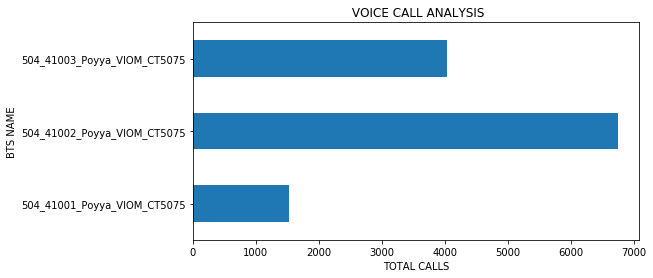

In [279]:
df1 = df2gmod.loc['504_41001_Poyya_VIOM_CT5075':'504_41003_Poyya_VIOM_CT5075','TOTAL CALLS']
plt.figure(figsize=(8, 4))
df1.plot.barh()
plt.title(" VOICE CALL ANALYSIS")
plt.xlabel("TOTAL CALLS")

Text(0.5, 0, 'TCH DROP RATE')

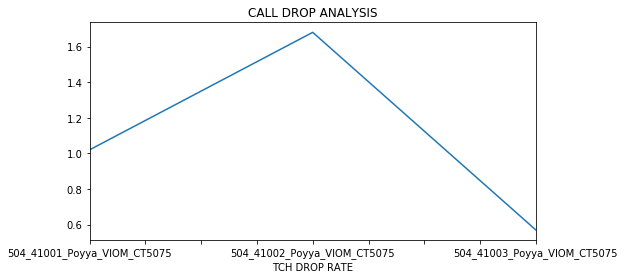

In [280]:
df2 = df2gmod.loc['504_41001_Poyya_VIOM_CT5075':'504_41003_Poyya_VIOM_CT5075','TCH DROP RATE']
plt.figure(figsize=(8, 4))
df2.plot.line()
plt.title("CALL DROP ANALYSIS")
plt.xlabel("TCH DROP RATE")

Text(0.5, 0, 'CALL SETUP SUCCESS RATE - OVERALL')

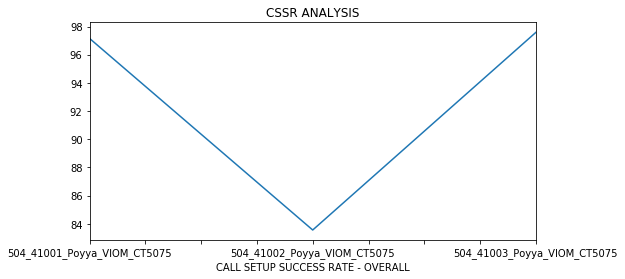

In [281]:
df3 = df2gmod.loc['504_41001_Poyya_VIOM_CT5075':'504_41003_Poyya_VIOM_CT5075','CALL SETUP SUCCESS RATE - OVERALL']
plt.figure(figsize=(8, 4))
df3.plot.line()
plt.title("CSSR ANALYSIS")
plt.xlabel("CALL SETUP SUCCESS RATE - OVERALL")

Text(0.5, 0, 'HOSR')

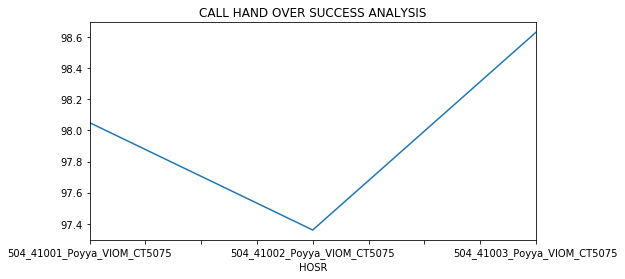

In [285]:
df4 = df2gmod.loc['504_41001_Poyya_VIOM_CT5075':'504_41003_Poyya_VIOM_CT5075','HOSR']
plt.figure(figsize=(8, 4))
df4.plot.line()
plt.title("CALL HAND OVER SUCCESS ANALYSIS")
plt.xlabel("HOSR")

Text(0.5, 0, 'HO FAIL RATE')

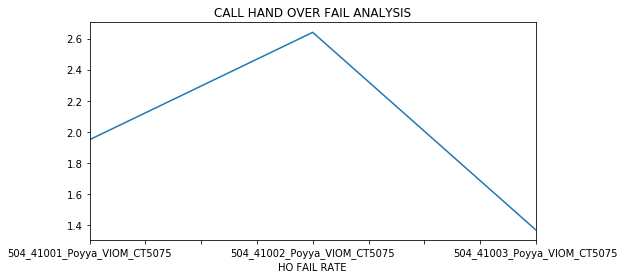

In [283]:
df5 = df2gmod.loc['504_41001_Poyya_VIOM_CT5075':'504_41003_Poyya_VIOM_CT5075','HO FAIL RATE']
plt.figure(figsize=(8, 4))
df5.plot.line()
plt.title("CALL HAND OVER FAIL ANALYSIS")
plt.xlabel("HO FAIL RATE")

Text(0.5, 0, 'TCH BLOCKING RATE')

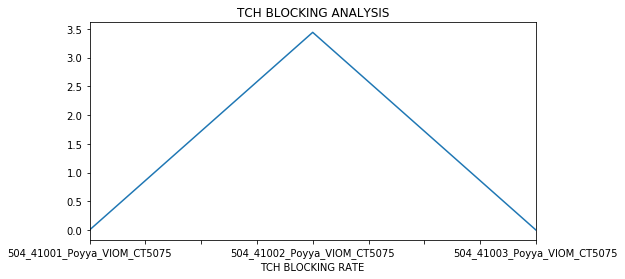

In [286]:
df6 = df2gmod.loc['504_41001_Poyya_VIOM_CT5075':'504_41003_Poyya_VIOM_CT5075','TCH BLOCKING RATE']
plt.figure(figsize=(8, 4))
df6.plot.line()
plt.title("TCH BLOCKING ANALYSIS")
plt.xlabel("TCH BLOCKING RATE")

Text(0.5, 0, 'TOTAL DROP CALLS')

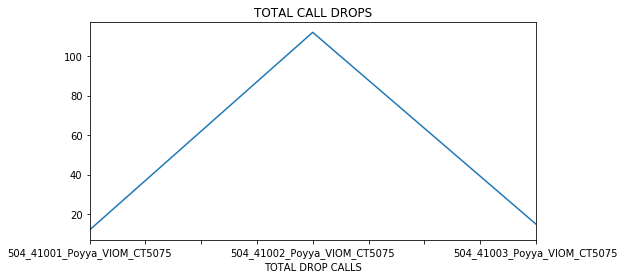

In [287]:
df6 = df2gmod.loc['504_41001_Poyya_VIOM_CT5075':'504_41003_Poyya_VIOM_CT5075','TOTAL DROP CALLS']
plt.figure(figsize=(8, 4))
df6.plot.line()
plt.title("TOTAL CALL DROPS")
plt.xlabel("TOTAL DROP CALLS")

Text(0.5, 0, 'CALL Success Vs Call Attempts')

<Figure size 720x288 with 0 Axes>

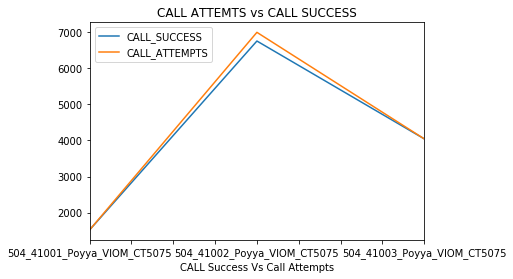

In [289]:
df7 = df2gmod.loc['504_41001_Poyya_VIOM_CT5075':'504_41003_Poyya_VIOM_CT5075','CALL_SUCCESS']
df8 = df2gmod.loc['504_41001_Poyya_VIOM_CT5075':'504_41003_Poyya_VIOM_CT5075','CALL_ATTEMPTS']
df1 = pd.DataFrame(df7)
df2 = pd.DataFrame(df8)
df = df1.join(df2, on='BTS NAME')
plt.figure(figsize=(10, 4))
df.plot.line()
plt.title("CALL ATTEMTS vs CALL SUCCESS")
plt.xlabel("CALL Success Vs Call Attempts")

## 4. Model Building

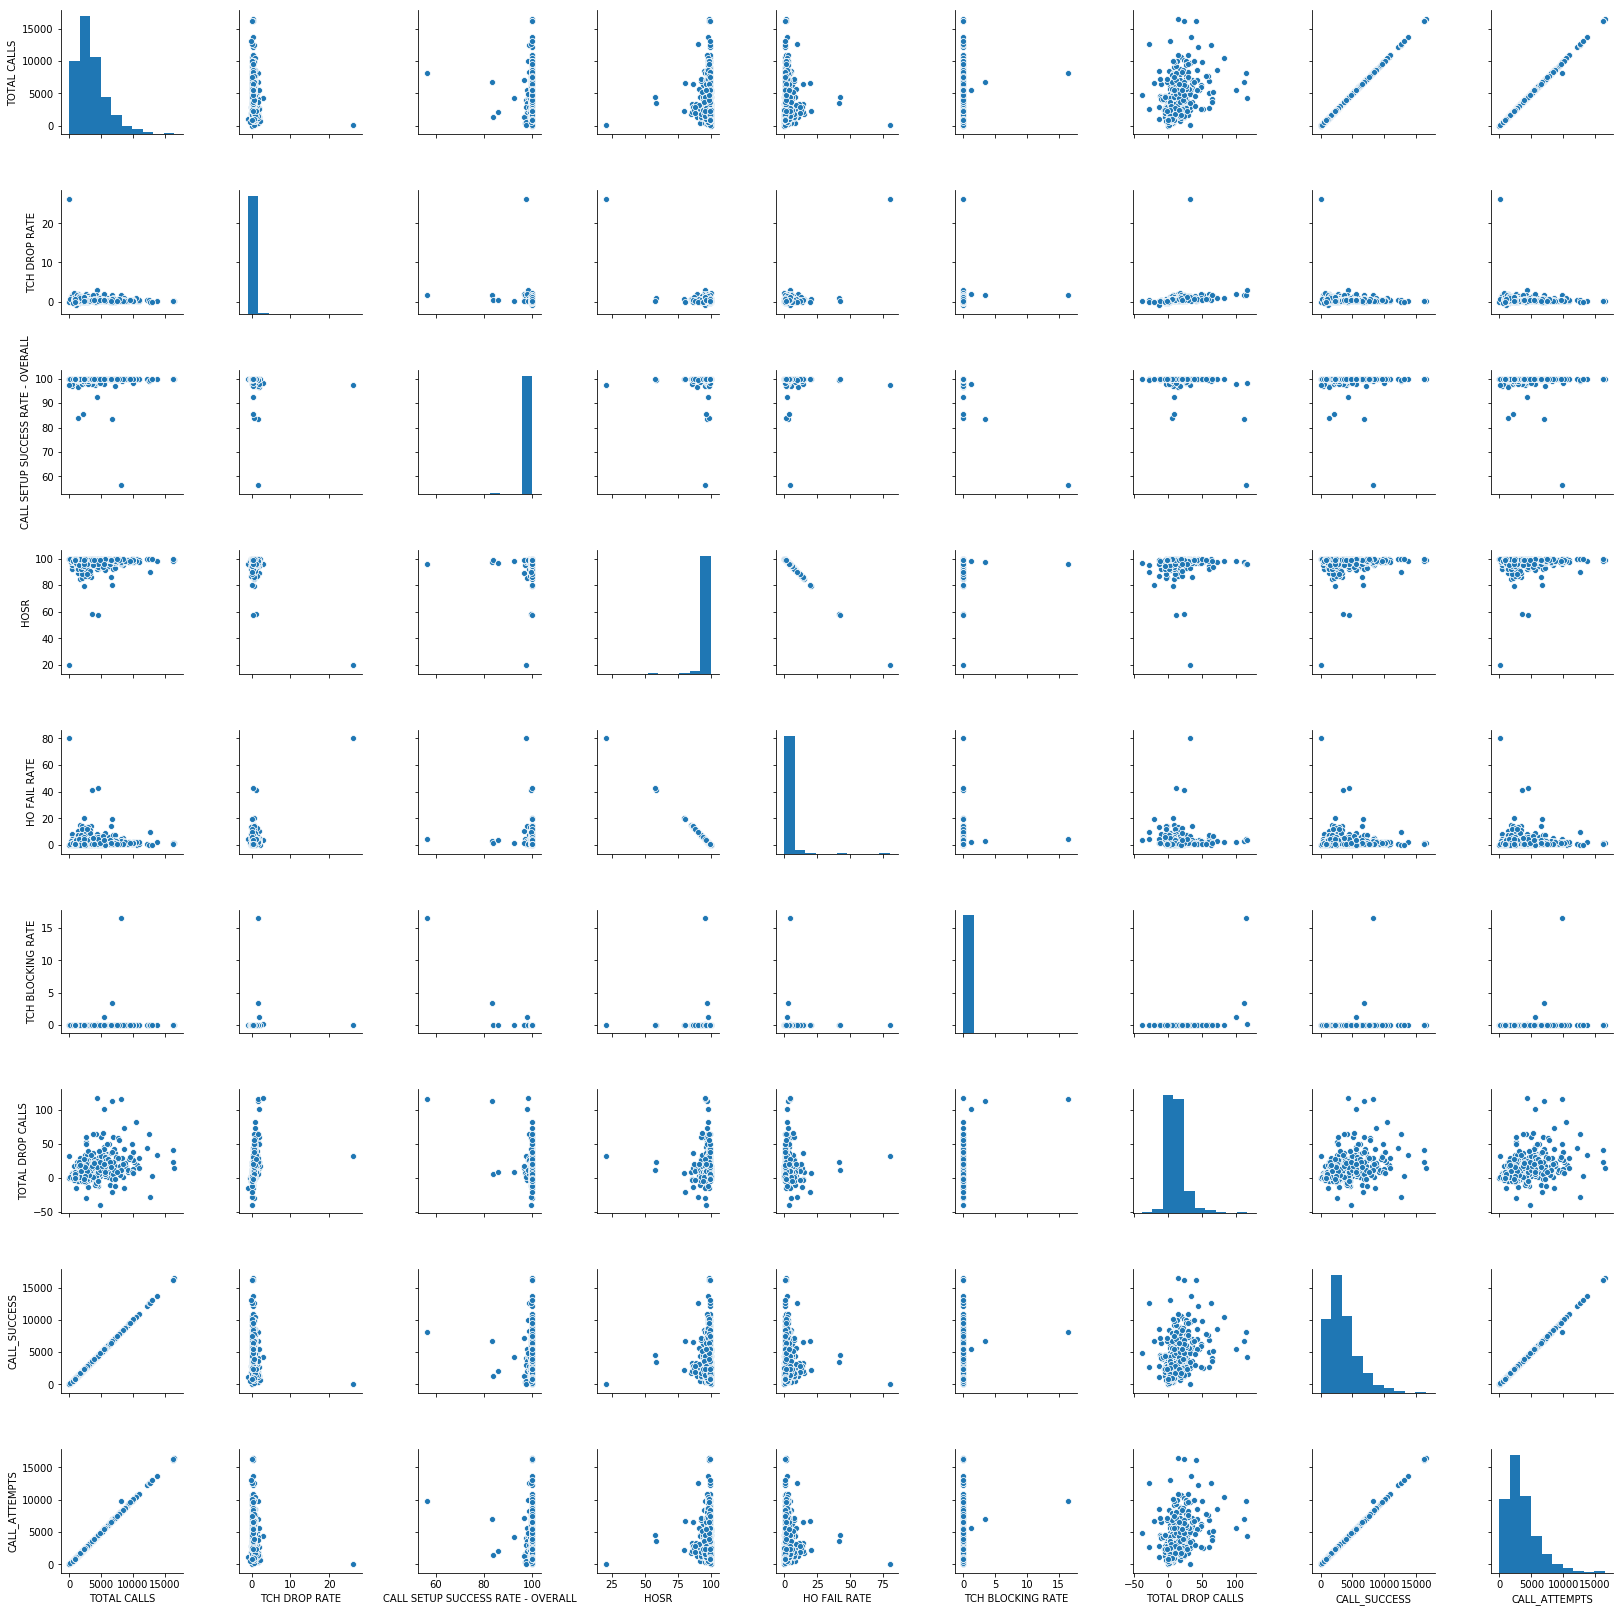

In [249]:
# Building Linear Regression Model according to given OBJECTIVE

# exploring all inter variable relationships with pairplot

sns.pairplot(df2gmod)

In [250]:
df2gmod.columns

Index(['BCF NAME', 'TOTAL CALLS', 'TCH DROP RATE',
       'CALL SETUP SUCCESS RATE - OVERALL', 'HOSR', 'HO FAIL RATE',
       'TCH BLOCKING RATE', 'TOTAL DROP CALLS', 'CALL_SUCCESS',
       'CALL_ATTEMPTS'],
      dtype='object')

In [251]:
# choosing input multivariate x-variables x-axis
x = df2gmod[['TOTAL CALLS',
       'CALL SETUP SUCCESS RATE - OVERALL', 'HOSR', 'HO FAIL RATE',
       'TCH BLOCKING RATE', 'TOTAL DROP CALLS', 'CALL_SUCCESS',
       'CALL_ATTEMPTS']]
x.head()

,TOTAL CALLS,CALL SETUP SUCCESS RATE - OVERALL,HOSR,HO FAIL RATE,TCH BLOCKING RATE,TOTAL DROP CALLS,CALL_SUCCESS,CALL_ATTEMPTS
BTS NAME,,,,,,,,
504_41001_Poyya_VIOM_CT5075,1523,97.16,98.05,1.95,0.00,12.0,1523.0,1523
504_41002_Poyya_VIOM_CT5075,6746,83.56,97.36,2.64,3.44,112.0,6746.0,6986
504_41003_Poyya_VIOM_CT5075,4041,97.59,98.63,1.37,0.00,15.0,4041.0,4041
504_41011_Nagari_VIOM_CT5078,7092,99.91,98.77,1.23,0.00,11.0,7092.0,7092
504_41012_Nagari_VIOM_CT5078,2566,99.96,97.64,2.36,0.00,-1.0,2566.0,2566


In [252]:
# choosing target y-variable y-axis

y = df2gmod[['TCH DROP RATE']]
y.head()

,TCH DROP RATE
BTS NAME,
504_41001_Poyya_VIOM_CT5075,1.02
504_41002_Poyya_VIOM_CT5075,1.68
504_41003_Poyya_VIOM_CT5075,0.57
504_41011_Nagari_VIOM_CT5078,0.16
504_41012_Nagari_VIOM_CT5078,0.04


In [253]:
# splitting data set into training set and testing set

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)


In [254]:
# importing linear regression

from sklearn.linear_model import LinearRegression

In [255]:
# Instanciate linear regression

lr = LinearRegression()

In [256]:
# Train the model

lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 5. Model Evaluation

In [257]:
# finding intercept of linear model

print(lr.intercept_)

[791.56451491]


In [258]:
# finding coefficients of linear model

print(lr.coef_)

[[-5.25421600e-03 -3.81888993e-02 -7.87661569e+00 -7.71205539e+00
  -1.19748720e+00  2.50226850e-02 -5.25421604e-03  1.04143793e-02]]


In [259]:
df_coef = pd.DataFrame(lr.coef_,columns = x.columns)
df_coef

,TOTAL CALLS,CALL SETUP SUCCESS RATE - OVERALL,HOSR,HO FAIL RATE,TCH BLOCKING RATE,TOTAL DROP CALLS,CALL_SUCCESS,CALL_ATTEMPTS
0,-0.005254,-0.038189,-7.876616,-7.712055,-1.197487,0.025023,-0.005254,0.010414


In [260]:
# Predictions of Trained LR Model

predictions = lr.predict(x_test)
predictions

array([[ 1.65721140e-01],
       [ 4.38686053e-02],
       [ 1.30656127e-01],
       [-2.17640378e-01],
       [ 1.47936170e+00],
       [ 1.50635211e-02],
       [-9.01292155e-01],
       [ 4.97036080e-01],
       [ 1.29734701e-01],
       [-6.42384010e-02],
       [ 1.03067655e+00],
       [ 2.31416935e-01],
       [ 6.70281398e-01],
       [ 1.04151611e+00],
       [ 3.01055060e-01],
       [ 2.65643430e-01],
       [ 5.81558559e-01],
       [ 2.71960939e-01],
       [ 4.43735428e-01],
       [-8.51152118e-02],
       [ 3.10748801e-01],
       [ 3.42687414e-01],
       [ 2.81288597e-01],
       [ 2.07991930e-01],
       [-2.93157735e-02],
       [ 7.87116887e-01],
       [ 1.01586372e-01],
       [ 2.48893928e+00],
       [ 1.14942939e-01],
       [ 8.37742343e-02],
       [ 6.01008249e-01],
       [ 5.68948709e-01],
       [ 6.91579117e-02],
       [ 2.83104447e-02],
       [-4.26825683e-01],
       [ 1.43456758e+00],
       [ 2.94089216e-01],
       [ 6.28349636e-01],
       [ 2.7

In [261]:
# Making a DF of predictions

df = pd.DataFrame(predictions,columns=['predictions'])
df.head()

,predictions
0,0.165721
1,0.043869
2,0.130656
3,-0.217640
4,1.479362


In [262]:
# Making a DF of Actuals

y_test.reset_index(drop = True,inplace=True)

y_test.head()

,TCH DROP RATE
0,0.18
1,0.06
2,0.07
3,0.15
4,0.43


In [263]:
# Renaming columns of y_test

y_test.rename(columns={'TCH DROP RATE':'actual'},inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [264]:
# Joining predictions DF and actual DF

df2g = df.join(y_test)
df2g.head()

,predictions,actual
0,0.165721,0.18
1,0.043869,0.06
2,0.130656,0.07
3,-0.217640,0.15
4,1.479362,0.43


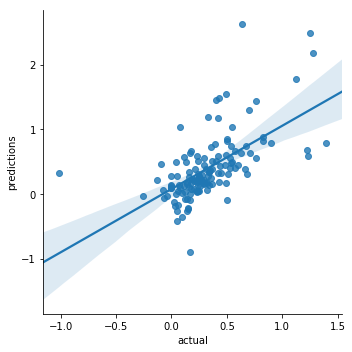

In [265]:
# Visualising predictions and actuals in a lm plot

sns.lmplot(x='actual',y='predictions', data=df2g)

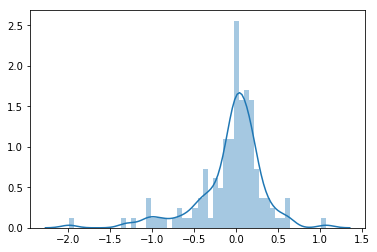

In [266]:
# Visualising Histogram

sns.distplot((y_test-predictions),bins=50);

In [267]:
# Evaluating Model Accuracy by MAE, MSE, RMSE

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.2651172537749076
MSE: 0.16929381502283927
RMSE: 0.41145329628384225
